In [1]:
import pandas as pd
df = pd.read_csv("thyroid.csv")

In [2]:
import numpy as np
df=df.replace({"?":np.NAN})

In [3]:
df=df.replace({"P":0,"N":1})

In [4]:
df=df.replace({"M":1,"F":2})

In [5]:
df=df.replace({"t":1,"f":0})

In [6]:
dele=["TBG","referral source",'TSH measured','T3 measured','TT4 measured','T4U measured','FTI measured',"TBG measured"]
for i in dele:
    del df[i]

In [7]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'binaryClass'],
      dtype='object')

In [8]:
from sklearn.impute import SimpleImputer
a = SimpleImputer(strategy='mean')
df['TSH'] = a.fit_transform(df[['TSH']])
df['sex'] = a.fit_transform(df[['sex']])
df['TT4'] = a.fit_transform(df[['TT4']])
df['FTI'] = a.fit_transform(df[['FTI']])
df['T4U'] = a.fit_transform(df[['T4U']])
df['age'] = a.fit_transform(df[['age']])
df['T3'] = a.fit_transform(df[['T3']])


In [22]:
df

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,binaryClass
0,41.0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.300000,2.5000,125.000000,1.140,109.000000,0
1,23.0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,4.100000,2.0000,102.000000,0.995,110.469649,0
2,46.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.980000,2.0135,109.000000,0.910,120.000000,0
3,70.0,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.160000,1.9000,175.000000,0.995,110.469649,0
4,70.0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.720000,1.2000,61.000000,0.870,70.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30.0,2.0,0,0,0,0,0,0,0,0,...,0,1,0,0,5.086766,2.0135,108.319345,0.995,110.469649,0
3768,68.0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.000000,2.1000,124.000000,1.080,114.000000,0
3769,74.0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.100000,1.8000,112.000000,1.070,105.000000,0
3770,72.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.700000,2.0000,82.000000,0.940,87.000000,0


In [10]:
from sklearn.model_selection import train_test_split as tts
y= df["binaryClass"]
x= df[['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI']]
x_train, x_test, y_train, y_test = tts(x, y, train_size=0.6, random_state=0)

In [11]:
from sklearn.tree import DecisionTreeClassifier
dtcmodel = DecisionTreeClassifier()
dtc = dtcmodel.fit(x_train,y_train)
dtcy_pred = dtcmodel.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score as acs
print("DecisionTreeClassifier Accuracy :",acs(dtcy_pred,y_test))

DecisionTreeClassifier Accuracy : 0.9960238568588469


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knmodel = KNeighborsClassifier(n_neighbors=3)
knn = knmodel.fit(x_train,y_train)
knny_pred = knmodel.predict(x_test)

In [14]:
print("KNeighborsClassifier Accuracy :",acs(knny_pred,y_test))

KNeighborsClassifier Accuracy : 0.950960901259112


In [15]:
from sklearn.svm import SVC
svcmodel = SVC()
svc = svcmodel.fit(x_train,y_train)
svcy_pred = svcmodel.predict(x_test)

In [16]:
print("SupportVectorMachine Accuracy :",acs(svcy_pred,y_test))

SupportVectorMachine Accuracy : 0.9443339960238568


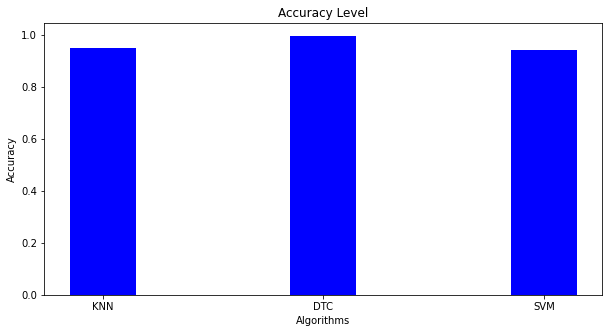

In [17]:
import numpy as np
import matplotlib.pyplot as plt
data = {'KNN':0.950960901259112, 'DTC':0.9973492379058979, 'SVM':0.9443339960238568}
alg = list(data.keys())
val = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(alg, val, color ='b',
        width = 0.3)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy Level")
plt.show()

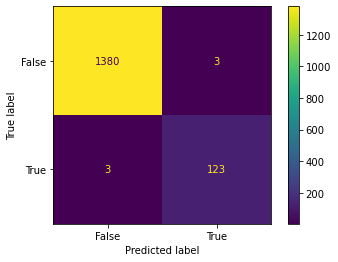

In [18]:
import matplotlib.pyplot as plt
from sklearn import metrics
confmatrix = metrics.confusion_matrix(y_test, dtcy_pred)
cmdisp = metrics.ConfusionMatrixDisplay(confusion_matrix = confmatrix, display_labels = [False, True])
cmdisp.plot()
plt.show()

In [19]:
l1=[]
prediction = dtcmodel.predict(x_test)
l1.append(prediction)
for i in l1:
    for j in i:
        print(j)

0
0
0
0
0
0
1
0
0
0
1
0
1
0
1
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0


In [20]:
x = input().split(",")
l=[]
for i in x:                        #fp 27.,2.,0.,0.,0.,0.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,2.6,2.01349983, 112., 1.15,97.
    l.append(float(i))             #fnn 23.,2.,0.,0.,0.,0.,0.,0.,0.,0.,0., 0.,0.,0.,0.,0.,4.1,2.,102.,0.9949997,110.46964866
pred = dtcmodel.predict([l])         #m 68.,1.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,2.4,1.6,83.,0.89,93.
dic ={1:"Male",2:"Female"}         #fnpp 19.,2.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,8.8,2.7,108.,1.11,97.
perg = {1:"Pregnant", 2:"Not pregnant"}
if l[1] == 1:
    print(dic[l[1]])
else :
    print(dic[l[1]])
    if l[6] ==1:
        print(perg[1])
    else:
        print(perg[2])
if pred == 1:
    print("Postive")
else:
    print("Negative")

19.,2.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,8.8,2.7,108.,1.11,97.
Female
Not pregnant
Postive
